# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
# Your work here.

1.) Checking for normality

(array([  3.00000000e-04,   6.00000000e-04,   1.20000000e-03,
          2.60000000e-03,   5.40000000e-03,   1.06000000e-02,
          1.89000000e-02,   3.15000000e-02,   5.54000000e-02,
          8.74000000e-02,   1.36300000e-01,   1.96800000e-01,
          2.72900000e-01,   3.64600000e-01,   4.58100000e-01,
          5.52700000e-01,   6.47900000e-01,   7.33000000e-01,
          8.04500000e-01,   8.65700000e-01,   9.14400000e-01,
          9.44300000e-01,   9.68100000e-01,   9.81300000e-01,
          9.89900000e-01,   9.94600000e-01,   9.97900000e-01,
          9.99100000e-01,   9.99800000e-01,   1.00000000e+00]),
 array([  95.4402703 ,   95.621401  ,   95.80253171,   95.98366242,
          96.16479313,   96.34592384,   96.52705455,   96.70818525,
          96.88931596,   97.07044667,   97.25157738,   97.43270809,
          97.6138388 ,   97.7949695 ,   97.97610021,   98.15723092,
          98.33836163,   98.51949234,   98.70062305,   98.88175376,
          99.06288446,   99.24401517, 

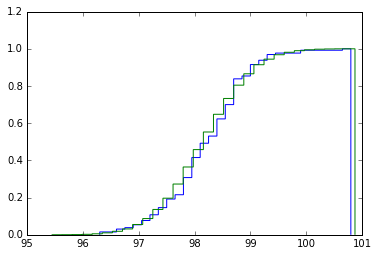

In [5]:
tmu = np.mean(df['temperature'])
tstd = np.std(df['temperature'])
plt.hist(df['temperature'], bins = 30, cumulative= True, normed = True, histtype = 'step')
normal = np.random.normal(tmu,tstd, 10000)
plt.hist(normal, bins = 30, cumulative = True, normed = True, histtype = 'step')

The distribution looked skewed to the left at first, but after plotting it along side a normal ditribution that used the dataset's mean and standard deviation, the ditribution actually looks pretty normal

2.) Is the sample size large? 

In [6]:
df.shape

(130, 3)

There are 130 observations, which makes it sufficiently large for a hypothesis test.

**3.)Is the true population mean 98.6 degrees?**

first try bootstrapping

In [7]:
#writing the function that will draw replicants of the data until the array is as long as the original data set
def bootstrap(data, func):
    bs_sample = np.random.choice(data,size = len(data))
    return func(bs_sample)
                                                                 

In [8]:
#finding the mean of each of the replicants
replicates = np.empty(10000)
for i in range(10000):
    replicates[i] = bootstrap(df['temperature'], np.mean)

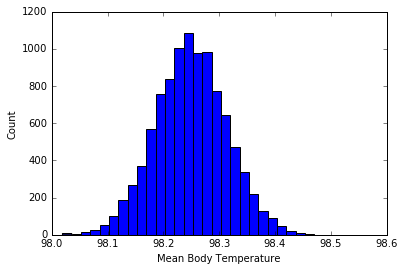

In [10]:
plt.hist(replicates, bins = 30)
plt.xlabel('Mean Body Temperature')
plt.ylabel('Count')

In [11]:
conf_int = np.percentile(replicates, [2.5,97.5])
conf_int

array([ 98.12384615,  98.37538462])

After bootstrapping 10,000 runs, 98.6 IS NOT within the 95% confidence interval of our data, even though the original data set said otherwise.

Now try frequentist statistical testing. I will use a one sample test because I am not comparing between two products or datasets, but rather comparing to a known value. I will also use a Z-test because n > 30

H_0: Mu = 98.6 degrees fahrenheit

H_a: Mu != 98.6 degrees fahrenheit

My alpha will 0.05.


In [39]:
#performing the z-test using the sample standard deviatiation
pop_mean = 98.6
z = (tmu - pop_mean)/(tstd/(len(df['temperature']))**(1/2))
z

-0.48027041116084646

In [40]:
p_valuez = stats.norm.cdf(z)
p_valuez

0.3155175627927288

My z-score is -0.4803, which corresponds to a p-value of 0.316. 

Since 0.32 > 0.05, then I cannot confidently conclude that H_0 is false.

Doing the t test. I am reusing the z score because it is the same value as the t score, but found on a different table

In [14]:
p_valuet = stats.t.sf(np.abs(z), len(df['temperature'])-1)
p_valuet

0.31592426986559241

The p-value is different by 0.0004, but it looks pretty much the same and would still not be able to throw out the null hypothesis.



**4.)Drawing a 10 point sample from the data and redoing the 2 tests. Theoretically, the t-test is the one that I should do because of the small value of n**

In [15]:
#getting the mean and standard deviations of the smaller sample
sample = np.random.choice(df['temperature'],size = 10)
sample_mean = np.mean(sample)
sample_std = np.std(sample)
sample_mean


98.560000000000002

In [16]:
sample_std

0.89353231614754758

In [17]:
z10 = (sample_mean - pop_mean)/(sample_std/10**(1/2))
z10

-0.044766148103575591

In [18]:
p_valuez10 = stats.norm.sf(abs(z10))
p_valuez10

0.48214685396445867

In [19]:
p_valuet10 = stats.t.sf(np.abs(z10), 10-1)
p_valuet10

0.48263561575041147

After doing this test with the smaller sample, the p-value from the t and z tests are 0.01 different rather than the much smaller value from before. 

**5.) At what temperature does it become abnormal?**

Unsure of this one. Just going to add and subtract the margin of error from the sample mean


In [47]:
MoE = 1.96*tstd/(len(df['temperature'])**(1/2))
MoE

1.4315012466538743

In [48]:
temp_high = tmu + MoE
temp_high

99.68073201588463

In [49]:
temp_low = tmu - MoE
temp_low

96.817729522576869

The acceptable temperatures are between 96.81 and 99.68 degrees fahrenheit

**6.) Is there a significant difference between the two genders**

H_0: There is no difference in mean temperature of the genders

H_a: male_mean does not = female_mean

In [23]:
males = df['temperature'].loc[df['gender']=='M']
females = df['temperature'].loc[df['gender'] == 'F']


In [24]:
males_mean = np.mean(males)
females_mean = np.mean(females)
empirical_diff = males_mean - females_mean
empirical_diff

-0.28923076923076962

In [25]:
def diff_of_means(data_1, data_2):
    "Making the function that will calculate the difference betweens means of the permutations"
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [26]:

def permutations(data_1, data_2):
    "Making permutations of the original data set and outputting them as perm_sample_1 and perm_sample_2"
    data = np.concatenate((males, females))
    permuted_data = np.random.permutation(data)
    
    perm_sample_1 = permuted_data[:len(data_1)]
    perm_sample_2 = permuted_data[len(data_1):]
    
    return perm_sample_1, perm_sample_2

    


In [27]:
def draw_perm_reps(data_1, data_2, func, size=1):
    "Takes the two outputs from the permutations function and uses the diff_of_means to take their differences"
    perm_replicates = np.empty(size)

    for i in range(size):
        
        perm_sample_1, perm_sample_2 = permutations(data_1,data_2)
        
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [28]:
#The p-value that the difference is at least as low as the difference from the data set is extremely low
theor_diffs = draw_perm_reps(males, females, diff_of_means, 10000)

p = (np.sum(theor_diffs <= empirical_diff) / len(theor_diffs))
p

0

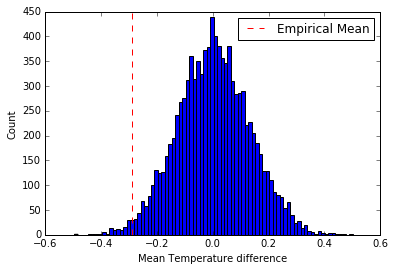

In [35]:
_ = plt.hist(theor_diffs, bins = 80)
_ = plt.axvline(x = empirical_diff, color = 'red', linestyle = 'dashed', label = 'Empirical Mean')
_ = plt.xlabel('Mean Temperature difference')
_ = plt.ylabel('Count')
_ = plt.legend(loc = 'upper right')
plt.show()

In [36]:
#Checking to make sure that there are at least some times when it is as big of a difference
np.sum(theor_diffs <= empirical_diff)

126

I used the permutation test to see how likely the mean of -2.89 is after shuffling the male and female data and then slicing it back out is. After 10,000 permutations, only about 100, or about 1% of the means were as extreme as the empirical data, leading me to believe that men have a lower mean body temperature than women. 

Story:

A doctor is called by a grade school teacher, Mrs. Johnson, and is told that, since it is flu season, the school held a routine body temperature test to see if any of the students displayed any abnormalities. They found that many students had a below average body temperature. In fact, the average body temperature of all 130 kids at the school was only 98.2 degrees, and they knew from the resident biology teacher, that Carl Wunderlich deduced in 1868 that the mean body temperature should be 98.6 degrees. 

The doctor assures Mrs. Johnson by showing her a histogram of 1,000 different studies where the most common average temperature, even amongst the healthy, was only around 98.25. He tells her that there was nothing for her to worry about, and that through the use of more accurate technology, leading scientists now believe that 98.6 is no longer an accurate number for the average body temperature of a human person, but rather, closer to the average that she found in her class. 

Mrs. Johnson then said that all her life she has recorded a 98.6 whenever she was healthy. Does this mean that Mrs. Johnson is some kind of old generation human that hasn't evolved to keep up with the times? The doctor shows her the confidence interval between 96.81 and 99.68 and that any temperature between those can be considered healthy for most people. 

Satisfied that the majority of her school is not dieing of some disease, she shakes your hand and you leave. 

The end...

